### Importing libraries and downloading dependencies

In [1]:
import pandas as pd
import os
from pathlib import Path
import re
from wordcloud import WordCloud
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
import gensim.corpora as corpora
from pprint import pprint
import pyLDAvis.gensim
import pickle
import pyLDAvis

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yangz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Reading files of interest

In [2]:
cwd = Path.cwd()
parent_path = cwd.parent
transcript_path = os.path.join(parent_path, "transcription_texts/cmu_computer_graphics_chapter_1_voice_transcribed.txt").replace("\\", "/")
print(transcript_path)

c:/Users/yangz/OneDrive/Desktop/nus_masters/procrastinate/transcription_texts/cmu_computer_graphics_chapter_1_voice_transcribed.txt


In [3]:
with open(transcript_path) as src:
    transcript_text = src.readlines()[0]

print(transcript_text)

 All right, welcome to our first lecture on computer graphics. Today we're just going to do an overview of computer graphics with two main objectives. One is to try to understand broadly what computer graphics is all about, where does it show up in the world, and we're actually also going to really get our hands on a first algorithm for making images from 3D shapes. Also, I should say, all information about course logistics is on the webpage. Today, I'm really going to is on the webpage. Today I'm really gonna dive into the content. Okay, so what is computer graphics? Why are we here? What do we want to talk about this semester? When you think about computer graphics, probably an image like this one comes to mind, something from maybe an animated movie, visual effects. But what we really want to study in this class more fundamentally is how computer graphics shows up broadly in computer science, what its function is in digital computation, and why we need it. So if we think back to the

### Performing preprocessing on the content of the text

In [4]:
punc_removed = re.sub('[,\.!?]', '', transcript_text)
case_lowered = punc_removed.lower()

print(case_lowered)

 all right welcome to our first lecture on computer graphics today we're just going to do an overview of computer graphics with two main objectives one is to try to understand broadly what computer graphics is all about where does it show up in the world and we're actually also going to really get our hands on a first algorithm for making images from 3d shapes also i should say all information about course logistics is on the webpage today i'm really going to is on the webpage today i'm really gonna dive into the content okay so what is computer graphics why are we here what do we want to talk about this semester when you think about computer graphics probably an image like this one comes to mind something from maybe an animated movie visual effects but what we really want to study in this class more fundamentally is how computer graphics shows up broadly in computer science what its function is in digital computation and why we need it so if we think back to the earliest computers the

<>:1: DeprecationWarning: invalid escape sequence \.
<>:1: DeprecationWarning: invalid escape sequence \.
C:\Users\yangz\AppData\Local\Temp\ipykernel_5052\2900807959.py:1: DeprecationWarning: invalid escape sequence \.
  punc_removed = re.sub('[,\.!?]', '', transcript_text)


### Visualizing the result of the preprocessing

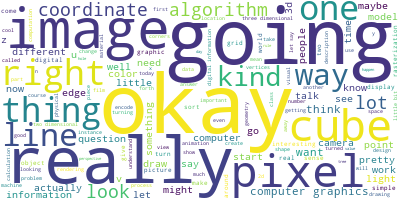

In [5]:
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color="steelblue")

# Generating a single word cloud
wordcloud.generate(case_lowered)

# Visualizing the word cloud
wordcloud.to_image()

### Removing fillers since there are a lot of them in spoken texts

In [66]:
fillers_removed = re.sub('\\b(?:okay|right|going|thing|kind|really|thing|one|lot|see|look|might|actually|now|different|pretty|think|kind|maybe|want|need|understand|well|like|little|could|say|also|all|can|will|welcome|our|first|lecture|to|up|try|broadly|where|is|about|the|just|do|get)\\b', '', case_lowered)
print(fillers_removed)

        on computer graphics today we're     an overview of computer graphics with two main objectives        what computer graphics     does it show  in  world and we're        hands on a  algorithm for making images from 3d shapes  i should   information  course logistics  on  webpage today i'm     on  webpage today i'm  gonna dive into  content  so what  computer graphics why are we here what  we   talk  this semester when you   computer graphics probably an image  this  comes  mind something from  an animated movie visual effects but what we    study in this class more fundamentally  how computer graphics shows   in computer science what its function  in digital computation and why we  it so if we  back   earliest computers they looked something  this these huge machines that took  an entire room and  way that you  interface with these machines was very crude you  have  punch holes in a card that gets fed into  computer it does some calculation and then it spits out some card  with

### Checking the wordcloud again

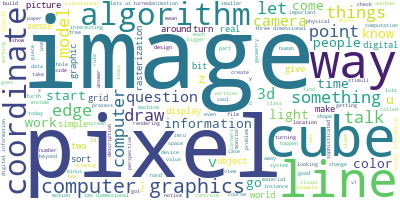

In [67]:
wordcloud.generate(fillers_removed)
wordcloud.to_image()

### Preparing the corpus for LDA Analysis

In [68]:
stop_words = stopwords.words("english")
stop_words.extend(["from", "subject", "re", "edu", "use"])

def sent_to_words(sentence):
    yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

data = fillers_removed
data_words = list(sent_to_words(data))
data_words = remove_stopwords(data_words)
print(data_words)

[['computer', 'graphics', 'today', 'overview', 'computer', 'graphics', 'two', 'main', 'objectives', 'computer', 'graphics', 'show', 'world', 'hands', 'algorithm', 'making', 'images', 'shapes', 'information', 'course', 'logistics', 'webpage', 'today', 'webpage', 'today', 'gonna', 'dive', 'content', 'computer', 'graphics', 'talk', 'semester', 'computer', 'graphics', 'probably', 'image', 'comes', 'mind', 'something', 'animated', 'movie', 'visual', 'effects', 'study', 'class', 'fundamentally', 'computer', 'graphics', 'shows', 'computer', 'science', 'function', 'digital', 'computation', 'back', 'earliest', 'computers', 'looked', 'something', 'huge', 'machines', 'took', 'entire', 'room', 'way', 'interface', 'machines', 'crude', 'punch', 'holes', 'card', 'gets', 'fed', 'computer', 'calculation', 'spits', 'card', 'holes', 'punched', 'takes', 'time', 'obviously', 'set', 'program', 'interpret', 'results', 'came', 'computer', 'must', 'better', 'way', 'digital', 'information', 'form', 'form', 'dig

### Corpus creation

In [69]:
# Creating a dictionary
id2word = corpora.Dictionary(data_words)

# Creating Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# Checking
print(corpus)

[[(0, 1), (1, 1), (2, 2), (3, 1), (4, 2), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 2), (14, 1), (15, 2), (16, 4), (17, 1), (18, 26), (19, 3), (20, 3), (21, 11), (22, 1), (23, 2), (24, 1), (25, 2), (26, 1), (27, 4), (28, 5), (29, 1), (30, 1), (31, 1), (32, 3), (33, 1), (34, 1), (35, 1), (36, 1), (37, 3), (38, 5), (39, 3), (40, 8), (41, 8), (42, 1), (43, 3), (44, 1), (45, 1), (46, 1), (47, 2), (48, 1), (49, 1), (50, 2), (51, 1), (52, 2), (53, 1), (54, 1), (55, 2), (56, 1), (57, 12), (58, 1), (59, 1), (60, 1), (61, 1), (62, 5), (63, 1), (64, 2), (65, 1), (66, 1), (67, 2), (68, 3), (69, 1), (70, 1), (71, 2), (72, 1), (73, 7), (74, 2), (75, 3), (76, 4), (77, 3), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 3), (85, 5), (86, 4), (87, 2), (88, 3), (89, 2), (90, 1), (91, 1), (92, 1), (93, 3), (94, 6), (95, 4), (96, 11), (97, 1), (98, 11), (99, 1), (100, 3), (101, 1), (102, 2), (103, 2), (104, 2), (105, 1), (106, 1), (107, 1), (108, 2), (109, 1), (11

### LDA Model Training

In [70]:
# We are choosing the top 5 topics to show here
num_topics = 5

lda_model = gensim.models.LdaMulticore(corpus=corpus, id2word=id2word, num_topics=num_topics)

# Print the Keyword in the 5 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.017*"computer" + 0.010*"cube" + 0.009*"graphics" + 0.008*"image" + '
  '0.008*"line" + 0.008*"way" + 0.008*"digital" + 0.007*"information" + '
  '0.006*"two" + 0.006*"things"'),
 (1,
  '0.009*"computer" + 0.007*"graphics" + 0.007*"cube" + 0.006*"image" + '
  '0.006*"information" + 0.005*"way" + 0.005*"two" + 0.005*"line" + '
  '0.005*"digital" + 0.004*"algorithm"'),
 (2,
  '0.012*"computer" + 0.010*"cube" + 0.010*"graphics" + 0.009*"way" + '
  '0.009*"image" + 0.007*"information" + 0.007*"line" + 0.007*"digital" + '
  '0.006*"things" + 0.005*"algorithm"'),
 (3,
  '0.014*"computer" + 0.011*"cube" + 0.009*"graphics" + 0.009*"image" + '
  '0.008*"information" + 0.007*"way" + 0.007*"line" + 0.006*"things" + '
  '0.006*"two" + 0.005*"pixel"'),
 (4,
  '0.012*"computer" + 0.011*"graphics" + 0.010*"image" + 0.008*"line" + '
  '0.008*"digital" + 0.008*"information" + 0.008*"cube" + 0.007*"way" + '
  '0.007*"two" + 0.006*"algorithm"')]


### Visualizing the topics

In [71]:
pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join(parent_path, "summarised_output/lda_prepared_"+str(num_topics)).replace("\\", "/")

# This is the expensive bit, make the Turn self_prep_viz = True if you wanna execute viz prep yourself

self_prep_viz = True

if self_prep_viz:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, "wb") as f:
        pickle.dump(LDAvis_prepared, f)

# Loading the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, "rb") as f:
    LDAvis_prepared = pickle.load(f)

html_file_path = os.path.join(parent_path, "summarised_output/ldavis_prepared_"+str(num_topics)+".html").replace("\\", "/")

pyLDAvis.save_html(LDAvis_prepared, html_file_path)

LDAvis_prepared

PreparedData(topic_coordinates=                  x         y  topics  cluster       Freq
topic                                                    
4      3.251206e-03 -0.000754       1        1  93.164194
0      1.692119e-03  0.001578       2        1   6.753573
3     -4.438920e-07 -0.000047       3        1   0.070466
2      1.678297e-04 -0.000793       4        1   0.006315
1     -5.110711e-03  0.000017       5        1   0.005453, topic_info=             Term       Freq      Total Category  logprob  loglift
204      computer  46.000000  46.000000  Default  30.0000  30.0000
488      graphics  41.000000  41.000000  Default  29.0000  29.0000
542         image  35.000000  35.000000  Default  28.0000  28.0000
255          cube  29.000000  29.000000  Default  27.0000  27.0000
558   information  29.000000  29.000000  Default  26.0000  26.0000
...           ...        ...        ...      ...      ...      ...
1200       visual   0.000582  14.719489   Topic5  -5.8547  -0.3221
871      question   0.000562  14.499463   Topic5  -5.8891  -0.3415
477            go   0.000547  16.327034   Topic5  -5.9170  -0.4880
230    coordinate   0.000511  18.617636   Topic5  -5.9833  -0.6856
1128        three   0.000503  14.270319   Topic5  -6.0008  -0.4372

[392 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
18        1  0.954365   algorithm
18        2  0.043380   algorithm
28        1  0.791910     already
33        1  0.785454      analog
55        1  1.022584  armadillos
...     ...       ...         ...
1223      1  0.774948         win
1227      1  0.836346     without
1233      1  0.904293       works
1240      1  0.799959     writing
1243      1  0.892257         xyz

[266 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 1, 4, 3, 2])